## Data Augmnetation and Image Pipelines

In [1]:
import numpy as np
import keras
import os
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
train_image_gen = ImageDataGenerator(
    rescale=1/255.0,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True
)

test_gen = ImageDataGenerator(
    rescale=1/255.0
)

In [3]:
train_gen = train_image_gen.flow_from_directory(
    "tiny-imagenet-200/train",
    target_size=(224,224),
    batch_size=128,
    class_mode='categorical'
)

Found 100000 images belonging to 200 classes.


In [7]:
class_ids = train_gen.class_indices # Used in getting classes of validation data
print(class_ids)

{'n01443537': 0, 'n01629819': 1, 'n01641577': 2, 'n01644900': 3, 'n01698640': 4, 'n01742172': 5, 'n01768244': 6, 'n01770393': 7, 'n01774384': 8, 'n01774750': 9, 'n01784675': 10, 'n01855672': 11, 'n01882714': 12, 'n01910747': 13, 'n01917289': 14, 'n01944390': 15, 'n01945685': 16, 'n01950731': 17, 'n01983481': 18, 'n01984695': 19, 'n02002724': 20, 'n02056570': 21, 'n02058221': 22, 'n02074367': 23, 'n02085620': 24, 'n02094433': 25, 'n02099601': 26, 'n02099712': 27, 'n02106662': 28, 'n02113799': 29, 'n02123045': 30, 'n02123394': 31, 'n02124075': 32, 'n02125311': 33, 'n02129165': 34, 'n02132136': 35, 'n02165456': 36, 'n02190166': 37, 'n02206856': 38, 'n02226429': 39, 'n02231487': 40, 'n02233338': 41, 'n02236044': 42, 'n02268443': 43, 'n02279972': 44, 'n02281406': 45, 'n02321529': 46, 'n02364673': 47, 'n02395406': 48, 'n02403003': 49, 'n02410509': 50, 'n02415577': 51, 'n02423022': 52, 'n02437312': 53, 'n02480495': 54, 'n02481823': 55, 'n02486410': 56, 'n02504458': 57, 'n02509815': 58, 'n0266

In [8]:
XTrainB,YTrainB = train_gen.next()
print(XTrainB.shape,YTrainB.shape)

(128, 224, 224, 3) (128, 200)


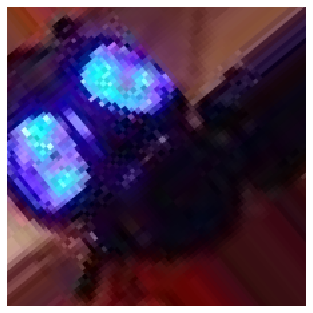

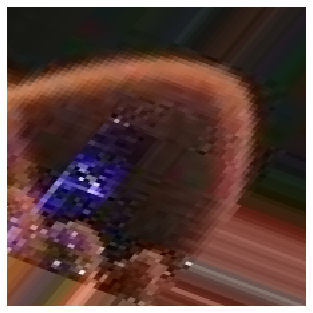

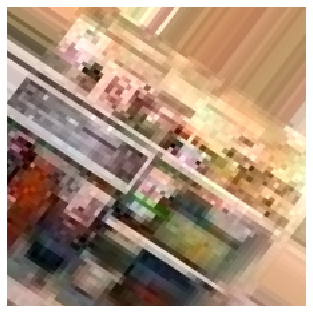

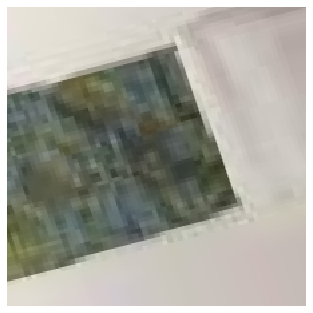

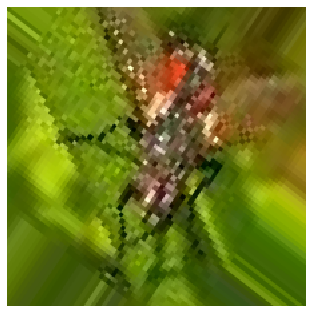

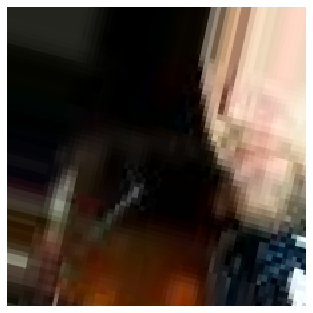

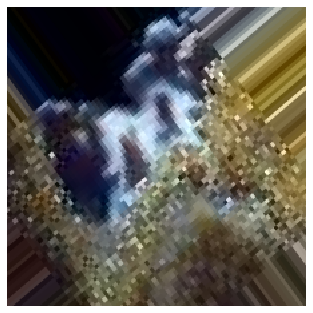

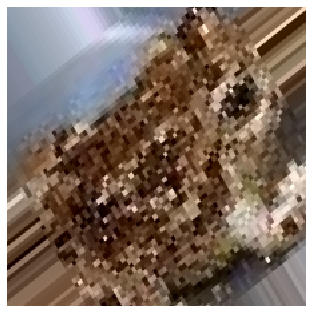

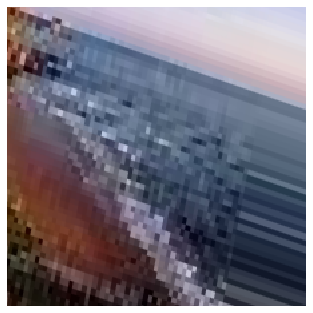

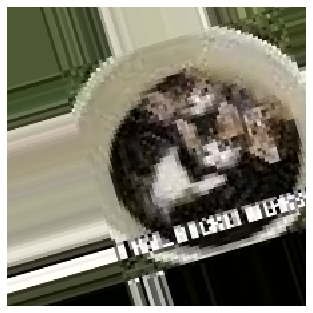

In [9]:
plt.style.use("seaborn")
for i in range(10):
    plt.imshow(XTrainB[i])
    plt.axis("off")
    plt.show()

In [10]:
def load_validation_data(target_size_img,no_of_classes):
    with open("tiny-imagenet-200/val/val_annotations.txt") as f:
        lines = f.readlines() # read all lines and put in an array
        #print(type(lines))
        #print(lines[0])
        
        m = len(lines)
        X_Val = np.empty((m,*target_size_img,3)) # (No_of_ex, W, H, 3)
        Y_Val = np.empty(m)
        
        for i, line in enumerate(lines):
            tokens = line.split()
            img_name = tokens[0]
            img_label = tokens[1]
            
            img_url = os.path.join("tiny-imagenet-200/val/images",img_name)
            img = image.load_img(img_url,target_size=target_size_img)
            X_Val[i,] = image.img_to_array(img)/255.0
            img.close()
            Y_Val[i] = class_ids[img_label]
            
        return X_Val, keras.utils.to_categorical(Y_Val)
            

In [11]:
X_val, Y_val = load_validation_data((224,224),200)

In [12]:
print(X_val.shape)
print(Y_val.shape)

(10000, 224, 224, 3)
(10000, 200)


## Building Model

In [13]:
from keras.layers import *
from keras.models import Sequential
from keras.datasets import mnist
from keras.utils import to_categorical

In [21]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(200,activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 24, 24, 128)      

In [22]:
# Compiling Model
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
adam = optimizers.adam(lr=1e-4)
model.compile(optimizer=adam,loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
hist = model.fit_generator(
    train_gen,
    epochs = 20,
    steps_per_epoch = 750,
)

Epoch 1/20
